In [1]:
import os
os.chdir("../")
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # disable tensorflow GPU
import sys
sys.path.insert(0, "src")

In [12]:
from shapely.geometry import Point, Polygon, MultiPolygon
import matplotlib.pyplot as plt
import numpy as np
from readers.tud_3dbag_cityjson import get_tile_id, download_tile, open_tile, get_building, get_building_surface
from readers.nwb_roads import get_roads_as_linestrings

## Load building

In [3]:
bag_id = "0200100000532701" 
house_epsg = Point((197906,467621))

tile_id = get_tile_id(house_epsg)
download_tile(tile_id)


cityjson_file = open_tile(tile_id)


building_cityjson = get_building(cityjson_file, bag_id)
surface = get_building_surface(building_cityjson, cityjson_file)

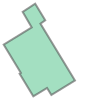

In [4]:
display(surface)

## Load walls

In [5]:
import pickle 
file = open('input/walls/walls_0200100000532701.obj', 'rb') 
walls = pickle.load(file)

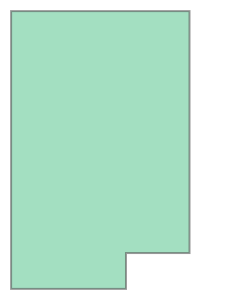

In [6]:
walls_poly = Point()

# combine all walls
for wall in walls:
    walls_poly = walls_poly.union(wall)

# fill rooms
for interior in walls_poly.interiors:
    interior = Polygon(interior)
    walls_poly = walls_poly.union(interior)
    


    
display(walls_poly)

## Load roads

In [28]:
surface_np = np.array(surface.exterior.xy).T
bbox_border = 10
surface_bbox = [surface_np[:,0].min() - bbox_border, surface_np[:,1].min() - bbox_border, 
                surface_np[:,0].max() + bbox_border, surface_np[:,1].max() + bbox_border]
nwb_roads = get_roads_as_linestrings(surface_bbox) 

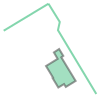

In [29]:
# Display: 
surface_and_roads = surface
for road in nwb_roads:
    surface_and_roads = surface_and_roads.union(road)
display(surface_and_roads)